# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#creates the URL to make request to weather API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#Empty lists to store information from cities
name_cities = []
lat_cities = []
temp_cities = []
humidity_cities = []
cloud_cities = []
wind_cities = []
count = 0
#Loop to request information from each city
for i in cities:
    weather_response = requests.get(query_url + i).json()
    #We do try in case the values requested do not exist
    try:
        name_cities.append(weather_response["name"])
        lat_cities.append(weather_response["coord"]["lat"])
        temp_cities.append(weather_response["main"]["temp"])
        humidity_cities.append(weather_response["main"]["humidity"])
        cloud_cities.append(weather_response["clouds"]["all"])
        wind_cities.append(weather_response["wind"]["speed"])
        print(f'information added: [{weather_response["name"]}]')
    except KeyError:
        print("city not found")
    count += 1
    if count == 499 :
        time.sleep(60)
        count=0
    
print("----------------------------------------\nProcess completed")

information added: [Eyl]
information added: [Ponta do Sol]
information added: [Jamestown]
information added: [Makakilo City]
information added: [Barrow]
information added: [Bethel]
city not found
information added: [Longyearbyen]
information added: [Mahébourg]
information added: [Cape Town]
information added: [Horta]
information added: [Port Alfred]
information added: [Rikitea]
information added: [Port Elizabeth]
information added: [Caraballeda]
information added: [Saskylakh]
information added: [Mehamn]
information added: [Saint-Joseph]
information added: [Albany]
information added: [New Norfolk]
information added: [Puerto Colombia]
information added: [Dingle]
information added: [Pangnirtung]
information added: [Carnarvon]
information added: [Atherton]
information added: [Tabatinga]
information added: [Leningradskiy]
information added: [Busselton]
information added: [Ardabil]
information added: [Le Port]
information added: [Atuona]
information added: [Punta Arenas]
information added: [

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
#We create a Data Frame from the list
city_dict = {'City': name_cities, 'Latitud': lat_cities, 'Temperature': temp_cities, 'Humidity': humidity_cities, 'Cloudiness': cloud_cities, 'Wind Speed': wind_cities}
city_df = pd.DataFrame(city_dict)
city_df.head(15)

,City,Latitud,Temperature,Humidity,Cloudiness,Wind Speed
0,Eyl,7.98,24.99,60,100,10.32
1,Ponta do Sol,32.67,17.62,72,20,2.60
2,Jamestown,42.10,21.79,83,90,2.60
3,Makakilo City,21.35,30.43,45,75,3.10
4,Barrow,71.29,4.00,93,90,3.60
5,Bethel,41.37,21.29,88,90,4.10
6,Longyearbyen,78.22,8.00,93,75,3.10
7,Mahébourg,-20.41,19.35,68,70,10.77
8,Cape Town,-33.93,13.00,62,0,1.00
9,Horta,38.53,20.69,71,29,2.36


In [25]:
#save DF to a CSV file, saved in output_data folder
city_df.to_csv("output_data/cities.csv",index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

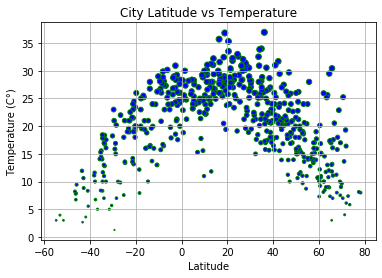

In [28]:
#We sort DF by Latitude
lat_city_df = city_df.sort_values(by = "Latitud",ascending=False)
lat_city_df.head()
#We create a scatter plot with the information from lat vs temp
plt.scatter(
    lat_city_df["Latitud"],
    lat_city_df["Temperature"],
    marker="o",
    facecolors='blue',
    edgecolors='green',
    s=lat_city_df["Temperature"],
    alpha=1)
#add title and labels
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C°)")
plt.grid()
plt.savefig('output_data/City Latitude vs Temperature.png')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

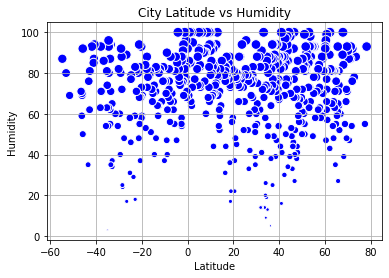

In [29]:
#We create a scatter plot with the information from Humidity vs temp
plt.scatter(
    lat_city_df["Latitud"],
    lat_city_df["Humidity"],
    marker="o",
    facecolors='blue',
    edgecolors='white',
    s=lat_city_df["Humidity"],
    alpha=1)
#add title and labels
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig('output_data/City Latitude vs Humidity.png')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

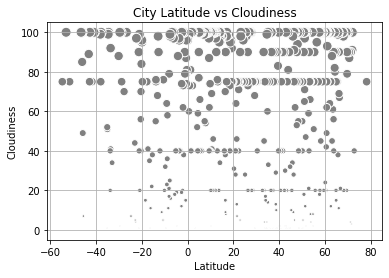

In [30]:
#We create a scatter plot with the information from Cloudiness vs temp
plt.scatter(
    lat_city_df["Latitud"],
    lat_city_df["Cloudiness"],
    marker="o",
    facecolors='gray',
    edgecolors='white',
    s=lat_city_df["Cloudiness"],
    alpha=1)
#add title and labels
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig('output_data/City Latitude vs Cloudiness.png')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

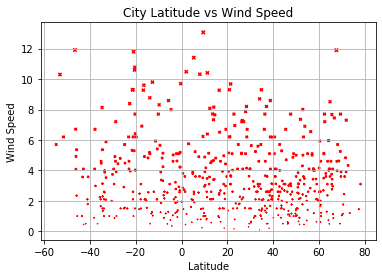

In [31]:
#We create a scatter plot with the information from Wind Speed vs temp
plt.scatter(
    lat_city_df["Latitud"],
    lat_city_df["Wind Speed"],
    marker="x",
    facecolors='red',
    edgecolors='black',
    s=lat_city_df["Wind Speed"],
    alpha=1)
#add title and labels
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig('output_data/City Latitude vs Wind Speed.png')
plt.show

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values , line_eq, rvalue

In [33]:
# Create Northern and Southern Hemisphere DataFrames
N_lat_city_df = lat_city_df[lat_city_df['Latitud'] >= 0]
S_lat_city_df = lat_city_df[lat_city_df['Latitud'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46312415071417096


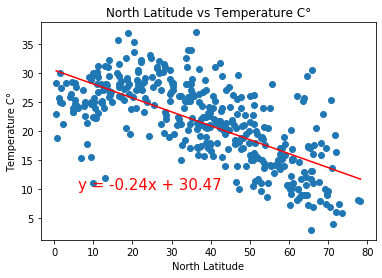

In [34]:
#Get X and Y values
x_values = N_lat_city_df['Latitud']
y_values = N_lat_city_df['Temperature']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(6,10),fontsize=15,color="red")
plt.title("North Latitude vs Temperature C°")
plt.xlabel('North Latitude')
plt.ylabel('Temperature C°')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/North Latitude vs Temperature C°.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6169373858016854


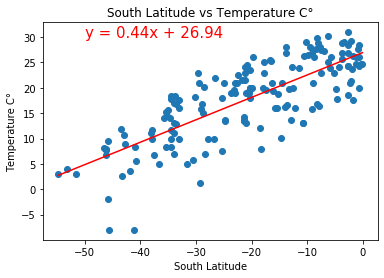

In [35]:
#Get X and Y values
x_values = S_lat_city_df['Latitud']
y_values = S_lat_city_df['Temperature']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(-50,30),fontsize=15,color="red")
plt.title("South Latitude vs Temperature C°")
plt.xlabel('South Latitude')
plt.ylabel('Temperature C°')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/South Latitude vs Temperature C°.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0028733566690348545


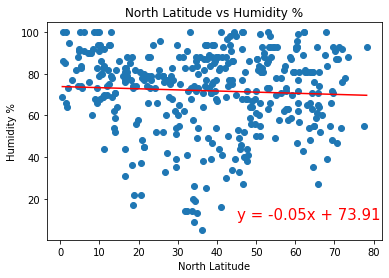

In [36]:
#Get X and Y values
x_values = N_lat_city_df['Latitud']
y_values = N_lat_city_df['Humidity']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(45,10),fontsize=15,color="red")
plt.title("North Latitude vs Humidity %")
plt.xlabel('North Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/North Latitude vs Humidity %.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01072742465268834


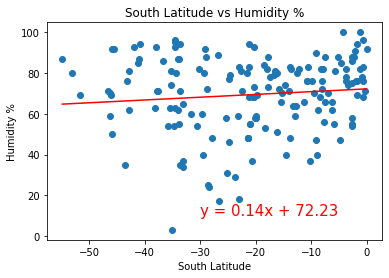

In [37]:
#Get X and Y values
x_values = S_lat_city_df['Latitud']
y_values = S_lat_city_df['Humidity']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(-30,10),fontsize=15,color="red")
plt.title("South Latitude vs Humidity %")
plt.xlabel('South Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/South Latitude vs Humidity %.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0035701180434044924


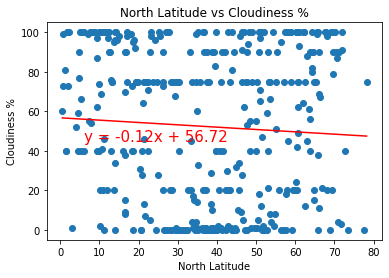

In [38]:
#Get X and Y values
x_values = N_lat_city_df['Latitud']
y_values = N_lat_city_df['Cloudiness']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(6,45),fontsize=15,color="red")
plt.title("North Latitude vs Cloudiness %")
plt.xlabel('North Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/North Latitude vs Cloudiness %.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0015095203669884545


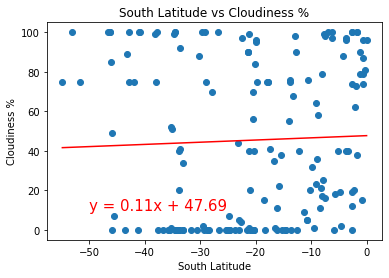

In [39]:
#Get X and Y values
x_values = S_lat_city_df['Latitud']
y_values = S_lat_city_df['Cloudiness']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(-50,10),fontsize=15,color="red")
plt.title("South Latitude vs Cloudiness %")
plt.xlabel('South Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/South Latitude vs Cloudiness %.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0030180408081042537


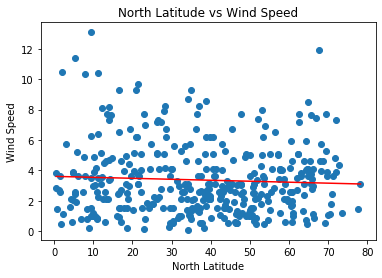

In [40]:
#Get X and Y values
x_values = N_lat_city_df['Latitud']
y_values = N_lat_city_df['Wind Speed']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(6,14),fontsize=15,color="red")
plt.title("North Latitude vs Wind Speed")
plt.xlabel('North Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/North Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00430006097054892


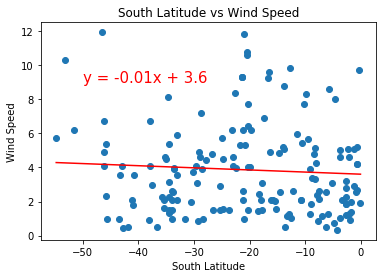

In [41]:
#Get X and Y values
x_values = S_lat_city_df['Latitud']
y_values = S_lat_city_df['Wind Speed']
#save return values from functions
reg, lin_eq, rvalue = lin_reg(x_values,y_values)
#Plot with Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,reg,"r-")
plt.annotate(lin_eq,(-50,9),fontsize=15,color="red")
plt.title("South Latitude vs Wind Speed")
plt.xlabel('South Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('output_data/South Latitude vs Wind Speed.png')
plt.show()